In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [ ]:
import pandas as pd

data = pd.read_csv("/content/housing.csv")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY

In [ ]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
# Assuming 'data' is your DataFrame
data_encoded = pd.get_dummies(data)  # One-hot encode categorical variables
correlation_matrix = data_encoded.corr()  # Compute correlation matrix


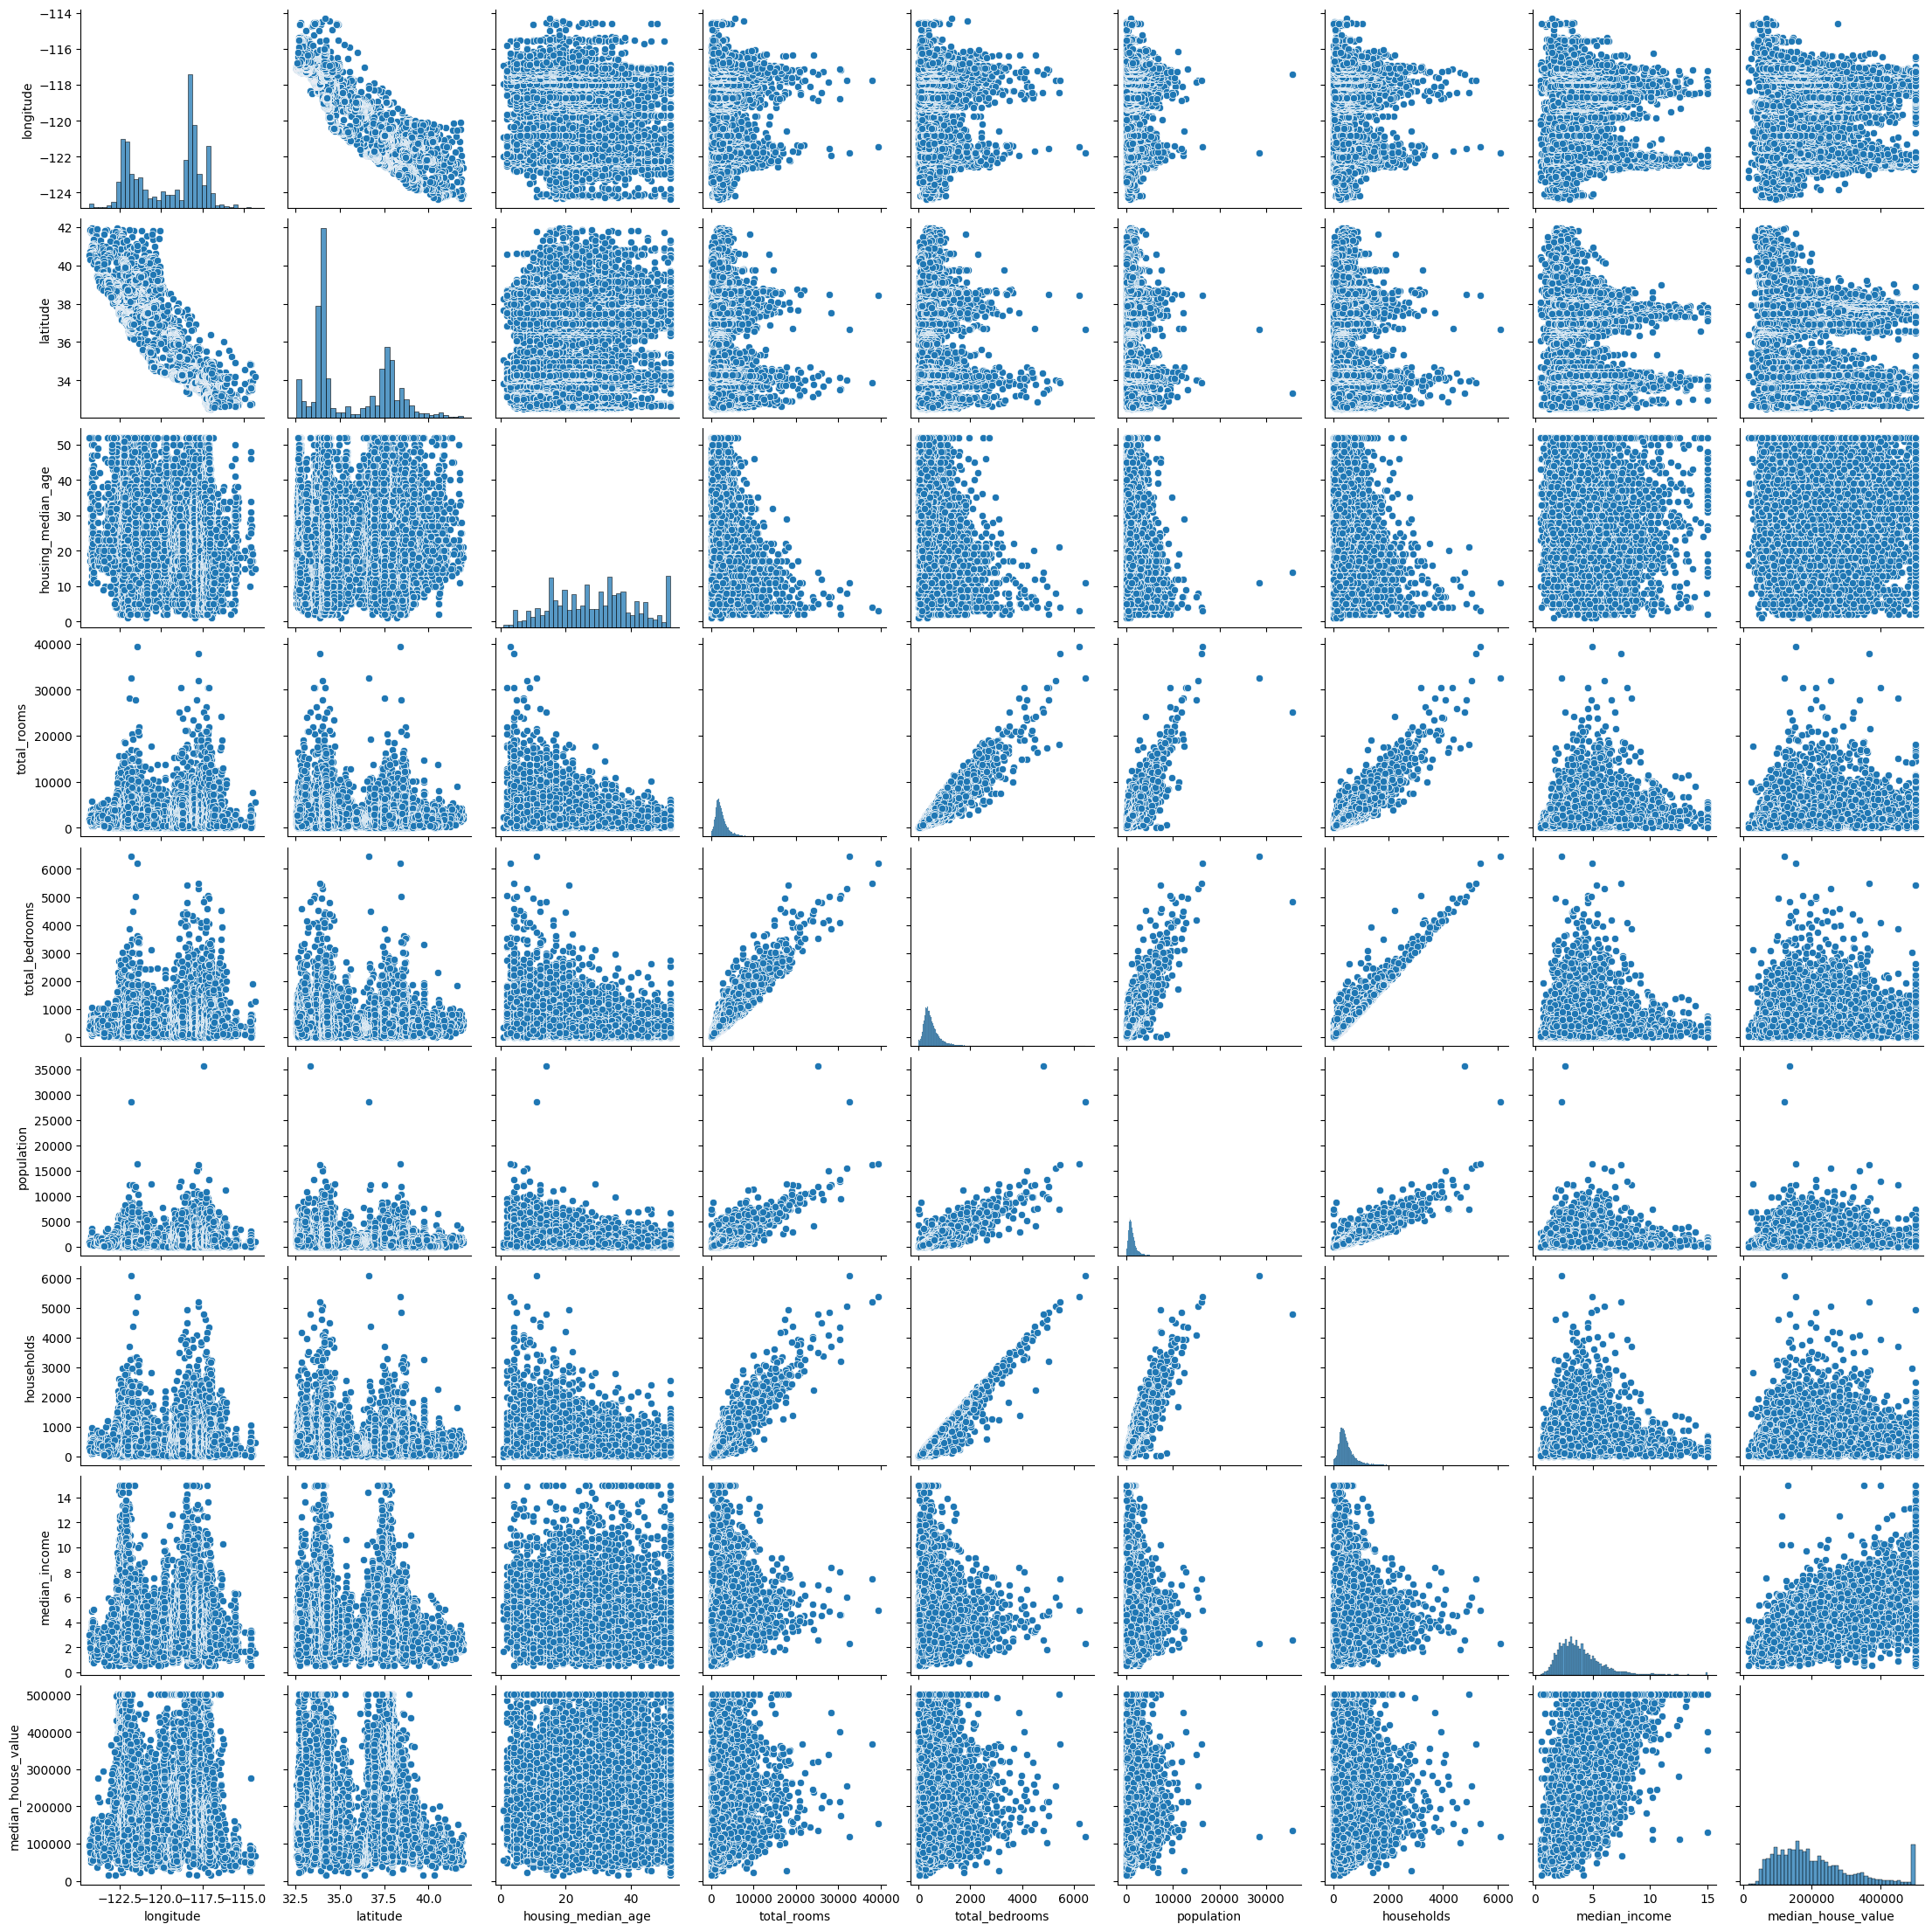

In [ ]:
sns.pairplot(data.select_dtypes(include=["number"]).dropna())

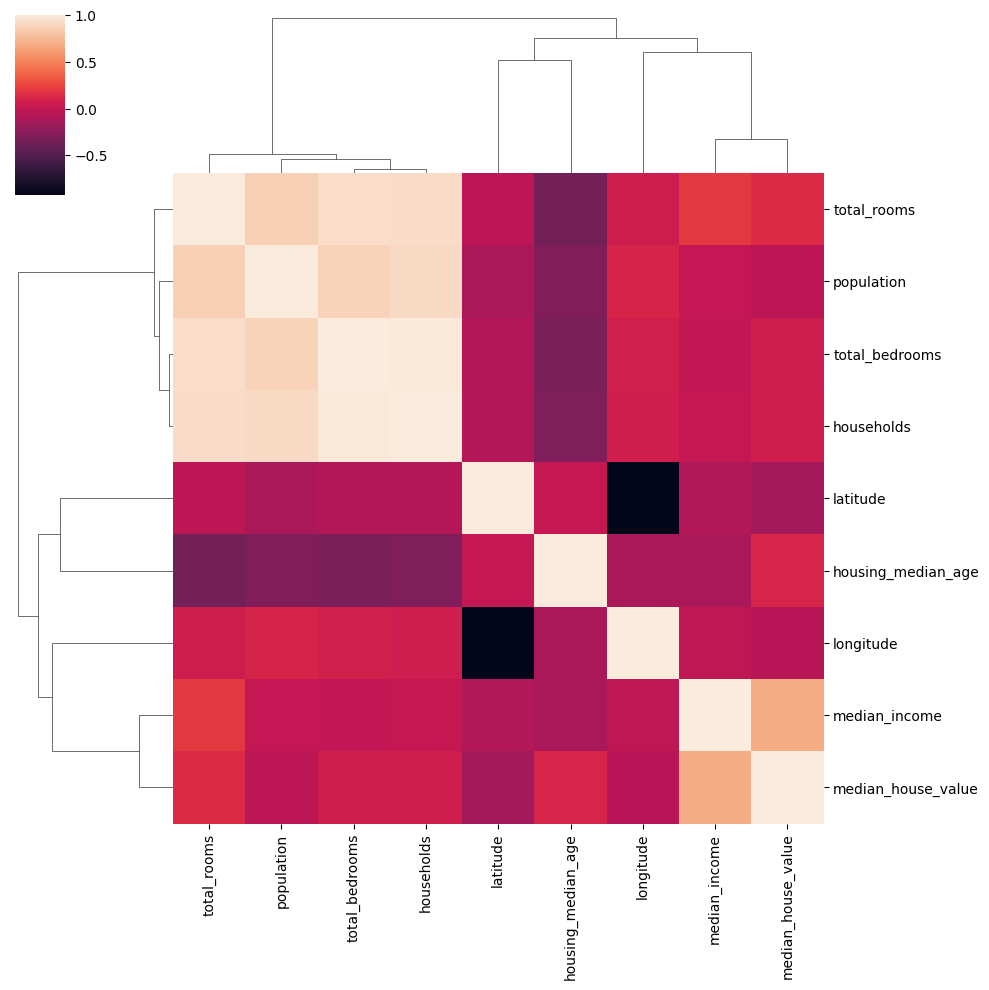

In [ ]:
sns.clustermap(data.select_dtypes(include=["number"]).dropna().corr())

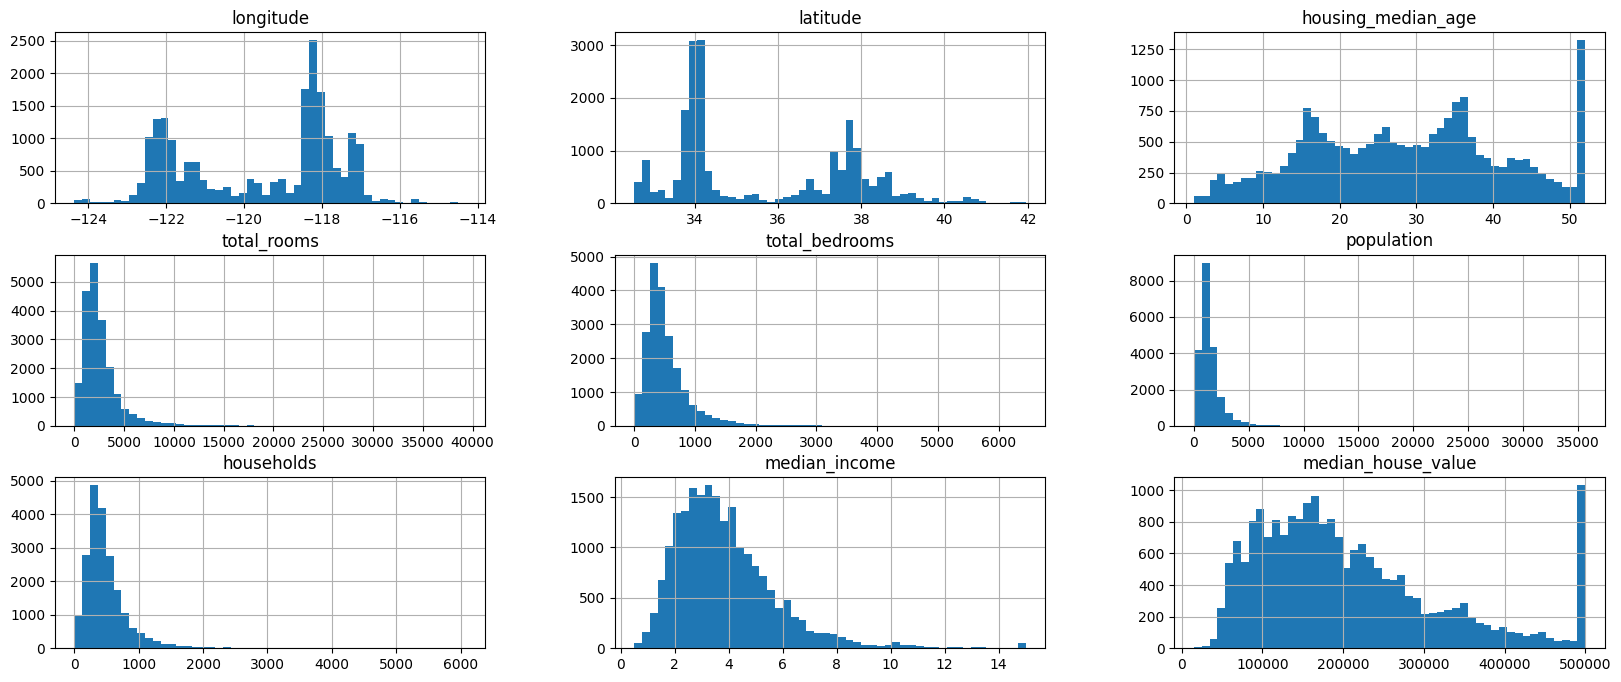

In [ ]:
data.hist(bins=50, figsize=(20,8))
plt.show()

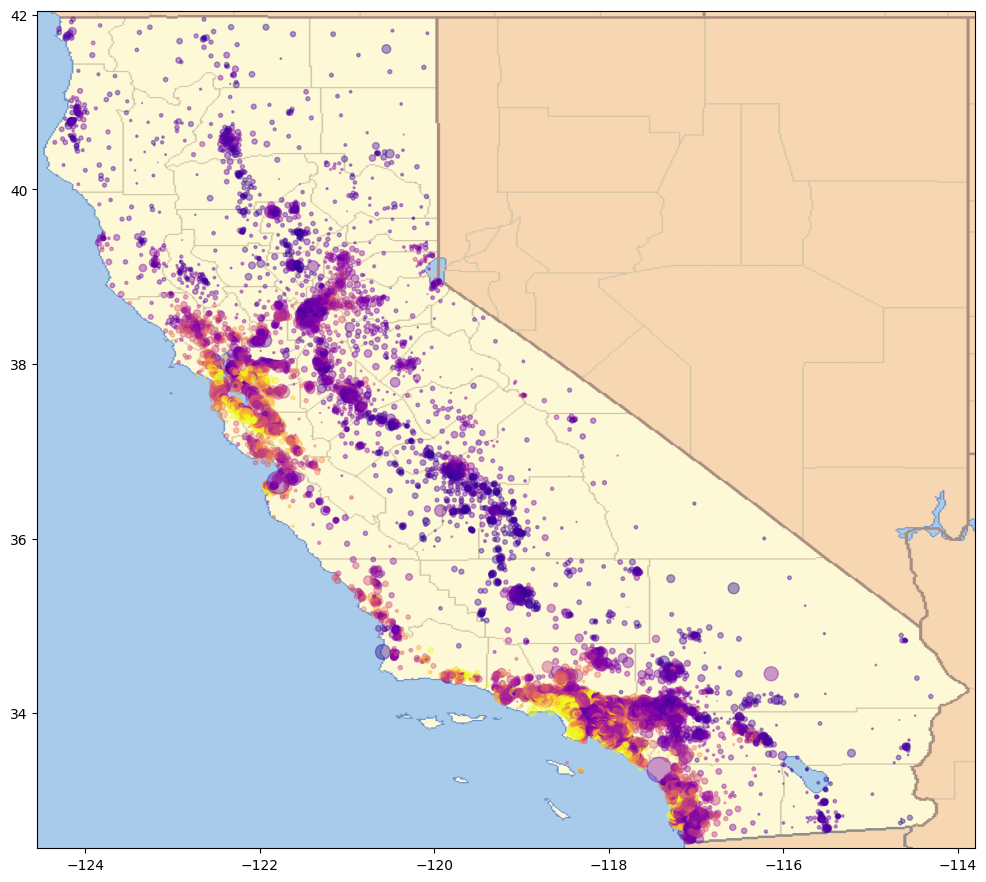

In [ ]:
import matplotlib.image as mpimg
import matplotlib.cm as cm

data_frame_plot = data[[
    'longitude',
    'population',
    'latitude',
    'median_house_value'
]]

plt.figure(figsize=(10,10))

plt.scatter(
        x=data_frame_plot.longitude,
    y=data_frame_plot.latitude,
    s=data_frame_plot.population/109,
    c=data_frame_plot.median_house_value,
    alpha=0.4,
    cmap='plasma',
    marker="o",
)

plt.imshow(
    plt.imread('/content/california.png'),
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.9
)

plt.tight_layout()
plt.show()


Train Test Splitting¶
Dieser Schritt mag an dieser Stelle unpassend wirken, aber Nein! Wir spalten unsere Daten bewusst jetzt sofort in Trainings- und Testdaten auf. Wir tun das, weil wir alle weiteren Vorverarbeitungsschritte nur an unseren Trainings-Daten justieren wollen. Unsere Test-Daten legen wir zur Seite und greifen sie erst wieder an, wenn es um die Evaluierung unseres Modells geht.

Beim Splitting sind technisch gesehen sogar zwei Schritte erforderlich: Dabei sind zwei Schritte notwendig. Zum einen müssen wir unser Datenset in Input- und Output-Features spalten. Zum anderen sollten wir unsere Daten in ein Trainings- und ein Test-Datenset zerlegen.

Train Test schematisch

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# trennen in input und output Features
input_feature_names = [
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity'
]

output_feature_names = ["median_house_value"]

# Datenset horizontal in input/output features splitten
X = data[input_feature_names]
y = data[output_feature_names]


In [ ]:
# trennen in nummerische und nicht-numerische Features
numeric_feature_names = list(X.select_dtypes(include=['number']).columns)
nonnumeric_feature_names = list(X.select_dtypes(exclude=['number']).columns)

# train/test Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1239
)

Schritt 3: Data Preprocessing

In [ ]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
data.total_bedrooms.isna().sum()

207

In [ ]:
# hier werden fehlende Werte z.B. mit 0 gefüllt
new_dataframe = old_dataframe.fillna(0)

# hier werden Zeilen mit fehlenden Werten gelöscht
new_dataframe = old_dataframe.dropna()


NameError: name 'old_dataframe' is not defined

Bereinigen nicht-nummerische Werte

In [ ]:
numeric, categories = data.ocean_proximity.factorize()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a new object of the LabelEncoder class
label_encoder = LabelEncoder()

# Define the labels
label_encoder.fit(data.ocean_proximity)

# Perform the encoding
encoded_data = label_encoder.transform(data.ocean_proximity)

# Alternatively, you can combine both steps in one
encoded_data = label_encoder.fit_transform(data.ocean_proximity)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate a new object of the OneHotEncoder class
one_hot_encoder = OneHotEncoder()

# Extract the values of the DataFrame as an nd-array
data_to_encode = data.ocean_proximity.values

# Reshape the values into a list of single lists
data_to_encode = data_to_encode.reshape(-1, 1)

# Fit and apply the encoder
# Alternatively, you could apply the fit() and transform() methods separately
encoded_data = one_hot_encoder.fit_transform(data_to_encode)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# neus Objekt der MinMaxScaler-Klasse instanziieren
mima_scaler = MinMaxScaler()

# fitten und anwenden des encoders
# alternativ könnten auch die methoden fit() und transform()
# separat voneinander angewendet werden
mima_scaler.fit_transform(data[numeric_feature_names])

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.00894083, 0.02055583,
        0.53966842],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.0672104 , 0.18697583,
        0.53802706],
       [0.21015936, 0.5642933 , 1.        , ..., 0.01381765, 0.02894261,
        0.46602805],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.0281398 , 0.07104095,
        0.08276438],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.02068444, 0.05722743,
        0.09429525],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.03879032, 0.08699227,
        0.13025338]])

In [ ]:
from sklearn.preprocessing import RobustScaler

# neus Objekt der RobustScaler-Klasse instanziieren
rob_scaler = RobustScaler()

# fitten und anwenden des encoders
# alternativ könnten auch die methoden fit() und transform()
# separat voneinander angewendet werden
rob_scaler.fit_transform(data[numeric_feature_names])

array([[-0.98680739,  0.95767196,  0.63157895, ..., -0.89978678,
        -0.87076923,  2.1975824 ],
       [-0.98416887,  0.95238095, -0.42105263, ...,  1.31663113,
         2.24307692,  2.18666422],
       [-0.98944591,  0.94973545,  1.21052632, ..., -0.71428571,
        -0.71384615,  1.70773218],
       ...,
       [-0.72031662,  1.36772487, -0.63157895, ..., -0.16950959,
         0.07384615, -0.84170929],
       [-0.74670185,  1.36772487, -0.57894737, ..., -0.45309168,
        -0.18461538, -0.76500677],
       [-0.72559367,  1.35185185, -0.68421053, ...,  0.23560768,
         0.37230769, -0.525816  ]])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
from sklearn.preprocessing import StandardScaler

step = ("name_of_step", StandardScaler())


In [ ]:
from sklearn.ensemble import RandomForestClassifier

step = ("name_of_step", RandomForestClassifier())


In [ ]:
class FeatureSelector:
  def __init__(self, features=[]):

        if type(features) != list:
            raise ValueError("Input features must be of type List.")

        self.c = features

  def fit(self, X, y=None):
        return self
  def transform(self, X):
        return X[self.c]

In [ ]:
X_pipeline = Pipeline([
    ("union", FeatureUnion([
        ("numeric", Pipeline([
            ("select_numeric_features", FeatureSelector(features=numeric_feature_names)),
            ("replacing_missing_values", SimpleImputer(strategy="mean")),
            ("scale_values", MinMaxScaler())
        ])),
        ("non-numeric", Pipeline([
            ("select_non-numeric_features", FeatureSelector(features=nonnumeric_feature_names)),
            ("replacing_missing_values", SimpleImputer(strategy="constant", fill_value="missing")),
            ("encode_values", OneHotEncoder())
        ]))
    ]))
])

In [ ]:
y_pipeline = Pipeline([
    ("scale", MinMaxScaler())
])

Daten durch Pipeline schicken

In [ ]:
X_pipeline.fit(X_train)
X_train_processed = X_pipeline.transform(X_train)
X_test_processed = X_pipeline.transform(X_test)

In [ ]:
y_pipeline.fit(y_train)
y_train_processed = y_pipeline.transform(y_train)
y_test_processed = y_pipeline.transform(y_test)

Schritt 4: Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train_processed)
lr_model.score(X_test_processed, y_test_processed)

0.6396741153876946

In [ ]:
from sklearn.linear_model import Ridge

rr_model = Ridge()
rr_model.fit(X_train_processed, y_train_processed)
rr_model.score(X_test_processed, y_test_processed)

0.6354538472695496

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_processed, y_train_processed)
dt_model.score(X_test_processed, y_test_processed)

0.6386596341438224

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = DecisionTreeRegressor()
rf_model.fit(X_train_processed, y_train_processed)
rf_model.score(X_test_processed, y_test_processed)

0.6303262649603856

Schritt 5: Evaluation

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6

output_notebook()

def plot_predictions_bokeh(model, X_test_processed, y_test, y_pipeline):

    prediction = model.predict(X_test_processed)
    prediction_rev = y_pipeline.inverse_transform(prediction.reshape(-1,1))

    red_color = '#d5042a'
    orange_color = '#ED7D31'
    blue_color = '#43bed8'
    lightgreen_color = '#98c235'
    darkgreen_color = '#0b8f6a'
    darkblue_color = '#0062A7'
    lightblue_color = '#4DBED3'

    r_min = y_test.min()[0]
    r_max = y_test.max()[0]

    plot = figure(
        title="Prediction accuracy",
        x_axis_label="actual",
        y_axis_label="prdiction",
        x_range=[r_min, r_max],
        y_range=[r_min, r_max]
    )
    plot.circle(
        y=prediction_rev.ravel(),
        x=y_test.values.ravel(),
        alpha=0.2,
        color=lightgreen_color
    )

    plot.line(
        x=[r_min,r_max],
        y=[r_min,r_max],
        color=red_color
    )

    show(plot)

In [ ]:
from sklearn.metrics import mean_squared_error

def plot_predictions_multi(models, X_test_processed, y_test, y_pipeline):

    """Method plots prediction accuracy of passed models

    :param models: List of fitted models
    :param X_test_processed: Processed input data
    :param y_test: Unprocessed output data matching input data
    :param y_pipeline: y Pipeline for inverse transformation
    :type models: List of objects
    :type X_test_processed: Input matrix
    :type y_test: Output vector
    :type y_pipeline: Fitted pipeline object
    """

    fig, ax = plt.subplots(1, len(models), figsize=(20,5))
    i = 0

    for model in models:

        prediction = model.predict(X_test_processed)
        prediction_rev = y_pipeline.inverse_transform(
            prediction.reshape(-1,1)
        )

        me = round(
            (mean_squared_error(
                y_test, prediction_rev
            ))**0.5, 2)

        ax[i].scatter(
            x=y_test,
            y=prediction_rev,
            color="k",
            alpha=0.3,
            label=f"prediction with me={me}"
        )

        ax[i].plot(
            [
                y_test.min()[0],
                y_test.max()[0]
            ],
            [
                y_test.min()[0],
                y_test.max()[0]
            ],
            color="red",
            ls="-",
            lw=4
        )

        ax[i].set_xlabel("acutal data")
        ax[i].set_ylabel("predicted data")
        ax[i].legend(loc=0)

        i += 1

In [ ]:
plot_predictions_bokeh(
    model=rf_model,
    X_test_processed=X_test_processed,
    y_test=y_test,
    y_pipeline=y_pipeline
)

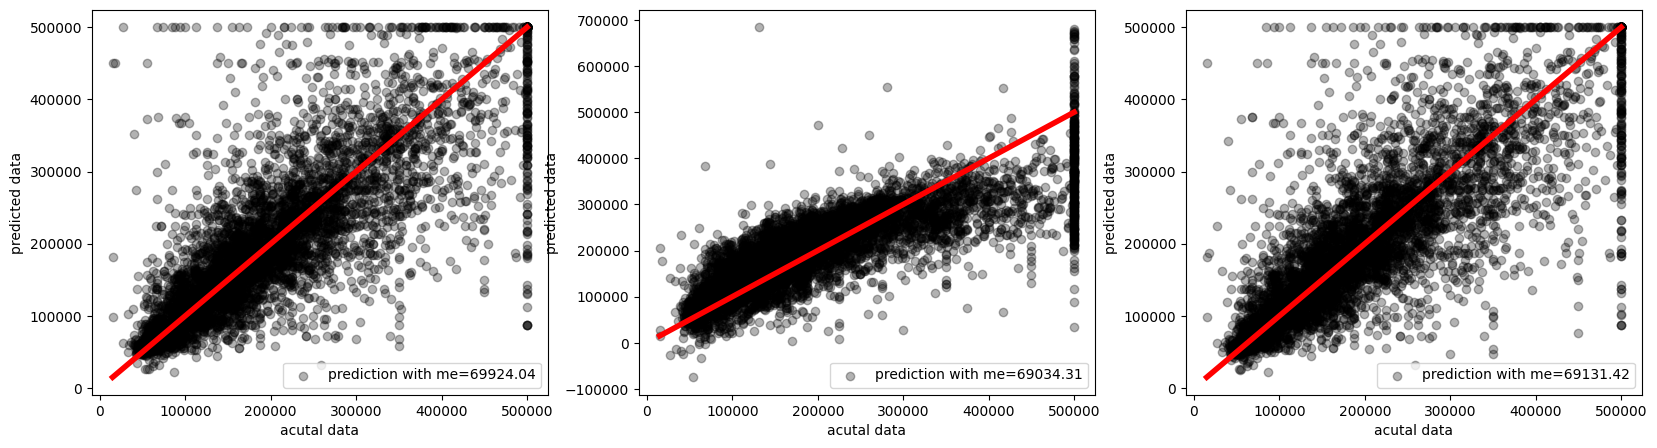

In [ ]:
plot_predictions_multi(
    models=[rf_model, lr_model, dt_model],
    X_test_processed=X_test_processed,
    y_test=y_test,
    y_pipeline=y_pipeline
)

Schritt 6: Deployment

In [ ]:
!pip install dill


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from dill import dump

output_file = "lr_model.pk"

# open the dedicated output file in write-binary mode
with open(output_file, "wb") as dump_file:
    dump(lr_model, dump_file)

In [ ]:
output_file = "X_pipeline.pk"

# open the dedicated output file in write-binary mode
with open(output_file, "wb") as dump_file:
    dump(X_pipeline, dump_file)

In [ ]:
output_file = "y_pipeline.pk"

# open the dedicated output file in write-binary mode
with open(output_file, "wb") as dump_file:
    dump(y_pipeline, dump_file)


In [ ]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from dill import load
from numpy import array


input_file = "lr_model.pk"
with open(input_file, "rb") as input_file:
        lr_model = load(input_file)

input_file = "X_pipeline.pk"
with open(input_file, "rb") as input_file:
        X_pipeline = load(input_file)

input_file = "y_pipeline.pk"
with open(input_file, "rb") as input_file:
        y_pipeline = load(input_file)

def create_prediction(
    longitude,
    latitude,
    housing_median_age,
    total_rooms,
    total_bedrooms,
    population,
    households,
    median_income,
    dist_lt_1h_ocean,
    dist_inland,
    dist_island,
    dist_near_bay,
    dist_near_ocean
):
    """This method creates a prediction using a serialized machine learning model

    :param longitude: A measure of how far west a house is; a higher value is farther west
    :param latitude: A measure of how far north a house is; a higher value is farther north
    :param housing_median_age: Median age of a house within a block; a lower number is a newer building
    :param total_rooms: Total number of rooms within a block
    :param total_bedrooms: Total number of bedrooms within a block
    :param population: Total number of people residing within a block
    :param households: Total number of households, a group of people residing within a home unit, for a block
    :param median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
    :param dist_lt_1h_ocean: Distance measure; 1 if < 1h to the ocean.
    :param dist_inland: Distance measure; 1 if inland.
    :param dist_island: Distance measure; 1 if island.
    :param dist_near_bay: Distance measure; 1 if near bay.
    :param dist_near_ocean: Distance measure; 1 if near ocean.
    :return: Prediction as Float.
    """

    # Create data object
    data = [[
        longitude,
        latitude,
        housing_median_age,
        total_rooms,
        total_bedrooms,
        population,
        households,
        median_income,
        dist_lt_1h_ocean,
        dist_inland,
        dist_island,
        dist_near_bay,
        dist_near_ocean
    ]]
     # Scale data object
    data_pre = X_pipeline.transform(data)

    # Generate prediction
    # Inverse scale prediction to original
    prediction = y_pipeline.inverse_transform(
        lr_model.predict(data_pre)
    )[0][0]

    return prediction


# Define Flask web service
app = Flask(__name__)


# Display a short message when root is called
@app.route('/')
def home_call():
    return "This is a flask Web service."


@app.route('/predict', methods=['GET'])
def predict():
    """This method creates a prediction from a http request
    :
    """
    # Read request argurments with default = 0
    longitude = float(request.args.get('longitude', '0'))
    latitude = float(request.args.get('latitude', '0'))
    housing_median_age = float(request.args.get('housing_median_age', '0'))
    total_rooms = float(request.args.get('total_rooms', '0'))
    total_bedrooms = float(request.args.get('total_bedrooms', '0'))
    population = float(request.args.get('population', '0'))
    households = float(request.args.get('households', '0'))
    median_income = float(request.args.get('median_income', '0'))
    dist_lt_1h_ocean = float(request.args.get('dist_lt_1h_ocean', '0'))
    dist_inland = float(request.args.get('dist_inland', '0'))
    dist_island = float(request.args.get('dist_island', '0'))
    dist_near_bay = float(request.args.get('dist_near_bay', '0'))
    dist_near_ocean = float(request.args.get('dist_near_ocean', '0'))

    # Create a new prediction for the incoming data
    prediction = create_prediction(
        longitude,
        latitude,
        housing_median_age,
        total_rooms,
        total_bedrooms,
        population,
        households,
        median_income,
        dist_lt_1h_ocean,
        dist_inland,
        dist_island,
        dist_near_bay,
        dist_near_ocean
    )

    output_dictionary = {
        "output_value": prediction,
        "message": "You can expect a median house value of " + str(prediction) + ".",
        "input_values": {
            "longitude": longitude,
            "latitude": latitude,
            "housing_median_age": housing_median_age,
            "total_rooms": total_rooms,
            "total_bedrooms": total_bedrooms,
            "population": population,
            "households": households,
            "median_income": median_income,
            "dist_lt_1h_ocean": dist_lt_1h_ocean,
            "dist_inland": dist_inland,
            "dist_island": dist_island,
            "dist_near_bay": dist_near_bay,
            "dist_near_ocean": dist_near_ocean
        }
    }

    return jsonify(output_dictionary)


@app.route('/predict/form')
def form():
    return render_template("input.html", title="Median House Value")


# Run app if directly called
if __name__ == "__main__":
      app.run(host='localhost', port=9999, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:9999
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
